In [1]:
from pmcmc import pMCMC

n_samples = 2**14
block_size = 2**9
n_iter = 2**15

theta, data = pMCMC.generate_data(n_samples)
pmh = pMCMC(data,block_size,n_iter)

In [2]:
output = pmh.launch()

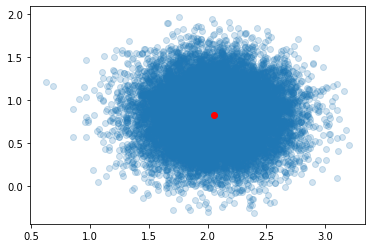

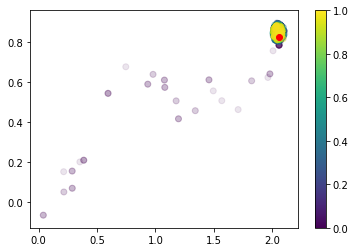

In [3]:
import matplotlib.pyplot as plt
import numpy as np
output_ = np.empty((n_iter,3))
output_[:,:2] = output[:,0,:]
output_[:,2] = np.arange(0,n_iter)

plt.figure()
plt.scatter(data[:,0],data[:,1],alpha=0.2)
plt.scatter(theta[0],theta[1],color='red')
plt.show()

fig = plt.figure()
plt.scatter(output_[:,0],output_[:,1],c=output_[:,2],alpha=0.1)
plt.scatter(theta[0],theta[1],color='red')
plt.colorbar()
plt.show()

In [4]:
means_scaled = np.empty((pmh.n_blocks,2))
covs_inv = np.empty((pmh.n_blocks,2,2))
for i in range(pmh.n_blocks):
    covs_inv[i] = np.linalg.inv(np.cov(output[block_size//2:,i,:].T)) #inverse of the covariance matrix
    means_scaled[i] = np.matmul(covs_inv[i], np.mean(output[block_size//2:,i,:],axis=0)) #means times inverse of covariance matrix
covs_M = np.linalg.inv(np.sum(covs_inv,axis=0))
mean_M = np.matmul(covs_M,np.sum(means_scaled,axis=0))

In [5]:
print((mean_M,covs_M)) #Harsh: @Alper, this is done! Cheers! Now I am working on the part where I am running the pyMC3 on my computer

(array([2.05799318, 0.82778225]), array([[6.13548612e-06, 1.20927081e-08],
       [1.20927081e-08, 6.08036420e-06]]))


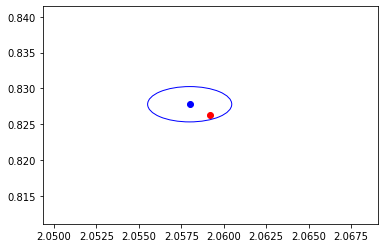

In [6]:
from pmcmc import confidence_ellipse
fig = plt.figure()
plt.scatter(theta[0],theta[1],color='red')
confidence_ellipse(mean_M,covs_M,plt.gca(),edgecolor='blue',facecolor='none')
plt.scatter(mean_M[0],mean_M[1],color='blue')

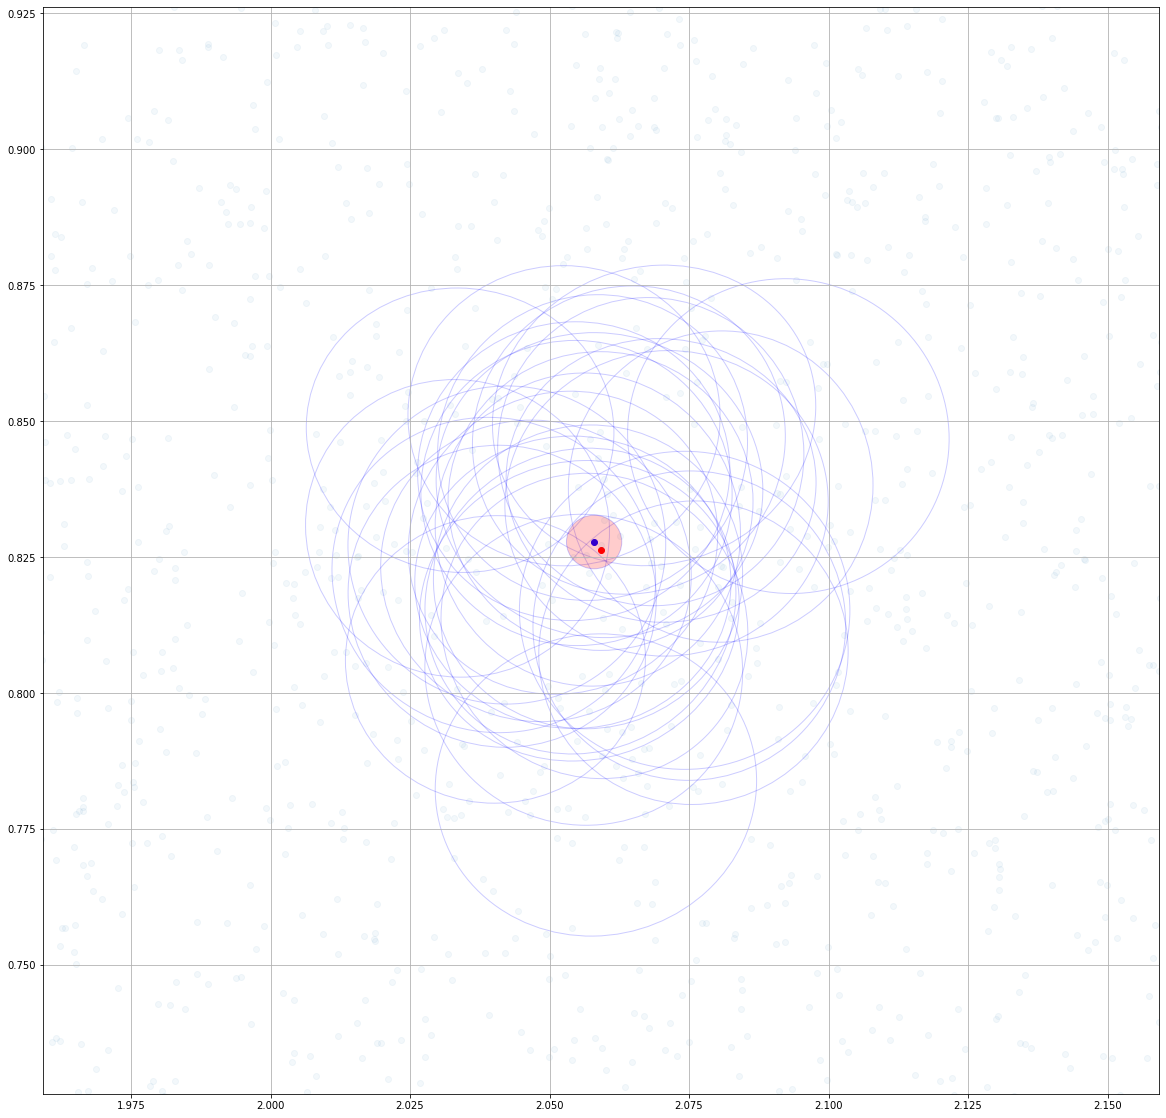

In [9]:
means = np.empty((pmh.n_blocks,2))
covs = np.empty((pmh.n_blocks,2,2))
fig = plt.figure(figsize=(20,20))
for i in range(pmh.n_blocks):
    means[i] = np.mean(output[block_size//2:,i,:],axis=0) #means
    covs[i] = np.cov(output[block_size//2:,i,:].T) #inverse of the covariance matrix
    confidence_ellipse(means[i],covs[i],plt.gca(),edgecolor='blue',facecolor='none',n_std=2,alpha=0.2)
plt.xlim(theta[0]-0.1,theta[0]+0.1)
plt.ylim(theta[1]-0.1,theta[1]+0.1)
plt.scatter(theta[0],theta[1],color='red')
confidence_ellipse(mean_M,covs_M,plt.gca(),edgecolor='blue',facecolor='red',alpha=0.2,n_std=2)
plt.scatter(mean_M[0],mean_M[1],color='blue')
plt.grid(True)
plt.scatter(data[:,0],data[:,1],alpha=0.05)
# plt.scatter(output[:,0,0],output[:,0,1],alpha=0.05,color='yellow')
# fig.savefig('subposteriors.png')